In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Datasets

- South African Vaccination Sites: (from 22nd of July)
    - District
    - Subdistrict (Not fully compatible with shapefiles for ploting)
    - Pfizer of J&J
    - Start Date
    - Open Days per week
    - Capacity per day
    - Coordinates (Rough Estimation needs further cleaning)

- South African Population Demographics (Age and Gender)
    - 


## Vulnerability Indicators:
 - Age (> 60)
 - ! Gender (Pregnancies) [needed]
 - To compare valnerability:
    - Cases per province
    - & Deaths 

## Access Indicators
 - Number of clinics and hospitals
 - Vaccine Sites


In [2]:
sa_hospitals = gpd.read_file('../../data/cleaned/sa_district_hospitals_population.json')
print(sa_hospitals.shape)
sa_hospitals.sample(n=5)

(52, 11)


,OBJECTID,PROVINCE,DISTRICT,DISTRICT.1,District_Name,Population,No. Public clinics,No. Public Hospitals,No. Private Clinics,No. Private Hospital,geometry
47,48,WC,DC1,West Coast,West Coast District Municipality DC1,470157,28,10,4,1,"MULTIPOLYGON (((17.98601 -33.15105, 17.98611 -..."
3,4,EC,DC10,Sarah Baartman,Sarah Baartman District Municipality DC10,532050,75,15,6,2,"POLYGON ((26.29896 -32.93213, 26.32140 -32.935..."
38,39,NC,DC6,Namakwa,Namakwa District Municipality DC6,113428,24,2,1,2,"POLYGON ((21.25947 -30.44115, 21.26075 -30.448..."
24,25,KZN,DC27,Umkhanyakude,Umkhanyakude District Municipality DC27,704651,59,5,8,0,"POLYGON ((32.61541 -28.13833, 32.61465 -28.141..."
1,2,GT,JHB,City of Johannesburg,City of Johannesburg District Municipality JHB,5316210,129,10,245,62,"POLYGON ((27.98484 -25.90973, 27.98514 -25.912..."


In [3]:
v_sites = gpd.read_file('../../data/cleaned/sites_with_districts.json')
print(v_sites.shape)
v_sites.sample(n=5)

(1026, 16)


,Unnamed: 0,District,Sub-District,Vaccination Site Name,Type of site,Pfizer or J&J,Start Date,Site Active (Yes/No),Open Days per week,Capacity per day,Latitude,Longitude,Municipality,DISTRICT_N,DISTRICT_C,geometry
99,99,O Tambo DM,Nyandeni LM,ec Ndanya Clinic,Clinic,J&J,2021-06-28 00:00:00,Yes,5 days,40.0,-31.472980,28.909070,Nyandeni,O.R.Tambo,DC15,POINT (28.90907 -31.47298)
1010,55,Vhembe District,Thulamela LM,Tshilidzini Team A,Mobile Outreach Site,J&J,7/12/2021,Yes,4 days,None,-28.996321,25.087143,Thulamela,Vhembe,DC34,POINT (25.08714 -28.99632)
521,18,Johannesburg MM,Johannesburg G SD,Stretford CHC,primary vaccination site,Pfizer,17/05/2021,Yes,5 days,160,-26.492520,27.845040,None,City of Johannesburg,JHB,POINT (27.84504 -26.49252)
924,93,Nkangala DM,Dr JS Moroka LM,Haakdoringlaagte Clinic,Fixed Outreach site,Pfizer,7/15/2021,Yes,5 days,200.0,-25.168860,28.416670,Dr JS Moroka,Nkangala,DC31,POINT (28.41667 -25.16886)
199,199,Joe Gqabi DM,Senqu LM,ec Palmietfontein Clinic,Clinic,J&J,2021-06-28 00:00:00,Yes,5 days,80.0,-28.996321,25.087143,Senqu,Joe Gqabi,DC14,POINT (25.08714 -28.99632)


In [4]:
pop_stat = pd.read_csv('../../data/cleaned/sa_district_popdem.csv')
print(pop_stat.shape)
print(pop_stat.columns)
pop_stat.sample(n=5)

(52, 62)
Index(['Unnamed: 0', 'ADM1_NAME', 'ADM1_PCODE', 'ADM2_NAME', 'ADM2_PCODE',
       'YEAR', 'F_TL', 'M_TL', 'T_TL', 'F_00_04', 'F_05_09', 'F_10_14',
       'F_15_19', 'F_20_24', 'F_25_29', 'F_30_34', 'F_35_39', 'F_40_44',
       'F_45_49', 'F_50_54', 'F_55_59', 'F_60_64', 'F_65_69', 'F_70_74',
       'F_75_79', 'F_80PLUS', 'M_00_04', 'M_05_09', 'M_10_14', 'M_15_19',
       'M_20_24', 'M_25_29', 'M_30_34', 'M_35_39', 'M_40_44', 'M_45_49',
       'M_50_54', 'M_55_59', 'M_60_64', 'M_65_69', 'M_70_74', 'M_75_79',
       'M_80PLUS', 'T_00_04', 'T_05_09', 'T_10_14', 'T_15_19', 'T_20_24',
       'T_25_29', 'T_30_34', 'T_35_39', 'T_40_44', 'T_45_49', 'T_50_54',
       'T_55_59', 'T_60_64', 'T_65_69', 'T_70_74', 'T_75_79', 'T_80PLUS',
       'DISTRICT_NAME', 'DISTRICT_CODE'],
      dtype='object')


,Unnamed: 0,ADM1_NAME,ADM1_PCODE,ADM2_NAME,ADM2_PCODE,YEAR,F_TL,M_TL,T_TL,F_00_04,...,T_45_49,T_50_54,T_55_59,T_60_64,T_65_69,T_70_74,T_75_79,T_80PLUS,DISTRICT_NAME,DISTRICT_CODE
51,51,WESTERN CAPE,ZA1,WEST COAST,ZA101,2020.0,245723.0,251762.0,497485.0,19732.0,...,30982.0,25704.0,21569.0,18560.0,14865.0,9694.0,6307.0,4017.0,West Coast,DC1
20,20,KWAZULU-NATAL,ZA5,ILEMBI,ZA529,2020.0,329375.0,307424.0,636799.0,34743.0,...,26664.0,21676.0,19649.0,19870.0,14308.0,10122.0,5997.0,5112.0,iLembe,DC29
41,41,NORTHERN CAPE,ZA3,FRANCIS BAARD,ZA309,2020.0,213697.0,206883.0,420580.0,19170.0,...,21995.0,19312.0,16528.0,14214.0,11166.0,7456.0,4961.0,3438.0,Frances Baard,DC9
2,2,EASTERN CAPE,ZA2,BUFFALO CITY,ZA292,2020.0,394283.0,366557.0,760840.0,33441.0,...,43524.0,38735.0,33345.0,25625.0,20962.0,15877.0,9047.0,6756.0,Buffalo City,BUF
45,45,NORTHERN CAPE,ZA3,SIYANDA,ZA308,2020.0,125805.0,133193.0,258998.0,10923.0,...,14038.0,11656.0,9599.0,8269.0,6295.0,4383.0,2888.0,1919.0,Z F Mgcawu,DC8


In [29]:
# There is a total population column in the pop_stats and sa_hospitals dfs
# Compare if they are showing similar values

pop_stat[['DISTRICT_CODE', 'DISTRICT_NAME', 'T_TL']]

combinded = sa_hospitals[['DISTRICT', 'geometry', 'Population']].merge((pop_stat[['DISTRICT_CODE', 'DISTRICT_NAME', 'T_TL']]), right_on='DISTRICT_CODE', left_on='DISTRICT')

combinded


,DISTRICT,geometry,Population,DISTRICT_CODE,DISTRICT_NAME,T_TL
0,EKU,"POLYGON ((28.25658 -25.92406, 28.27121 -25.925...",3609251,EKU,Ekurhuleni,3739653.0
1,JHB,"POLYGON ((27.98484 -25.90973, 27.98514 -25.912...",5316210,JHB,City of Johannesburg,5540727.0
2,BUF,"POLYGON ((27.35458 -32.67444, 27.37057 -32.675...",866515,BUF,Buffalo City,760840.0
3,DC10,"POLYGON ((26.29896 -32.93213, 26.32140 -32.935...",532050,DC10,Sarah Baartman,491156.0
4,DC12,"POLYGON ((27.21809 -32.89017, 27.21815 -32.890...",1002243,DC12,Amathole,789726.0
5,DC13,"POLYGON ((25.26894 -31.21748, 25.26886 -31.218...",822086,DC13,Chris Hani,752217.0
6,DC14,"POLYGON ((26.15517 -30.48341, 26.15566 -30.483...",377137,DC14,Joe Gqabi,339473.0
7,DC15,"POLYGON ((29.18180 -31.95186, 29.18170 -31.952...",1511736,DC15,O.R.Tambo,1358678.0
8,DC44,"POLYGON ((29.54468 -30.64754, 29.54510 -30.647...",879284,DC44,Alfred Nzo,788235.0
9,NMA,"POLYGON ((25.46655 -33.56087, 25.47915 -33.564...",1320574,NMA,Nelson Mandela Bay,1230491.0


In [30]:

pop_difference = combinded['Population'].sub(combinded['T_TL'])
print(pop_difference.describe())
pop_difference

count        52.000000
mean      39846.980769
std       92232.799847
min     -242234.000000
25%       -3809.250000
50%       45302.500000
75%       99231.250000
max      223874.000000
dtype: float64


0    -130402.0
1    -224517.0
2     105675.0
3      40894.0
4     212517.0
5      69869.0
6      37664.0
7     153058.0
8      91049.0
9      90083.0
10     49711.0
11    103501.0
12    134163.0
13     13219.0
14    -39612.0
15       668.0
16     33436.0
17    -78008.0
18     82426.0
19    137416.0
20    115315.0
21     61071.0
22     84304.0
23    110330.0
24     61333.0
25    118898.0
26     79144.0
27     73047.0
28    223874.0
29    175734.0
30    152612.0
31     54455.0
32      6962.0
33    127393.0
34     79168.0
35    -11663.0
36    -94356.0
37    -11753.0
38     -3659.0
39     15641.0
40      7694.0
41    -38956.0
42    -32829.0
43     97808.0
44      7158.0
45     17890.0
46   -242234.0
47    -27328.0
48     23955.0
49     -4260.0
50    -37536.0
51        21.0
dtype: float64

In [28]:
pop_stat.columns

Index(['Unnamed: 0', 'ADM1_NAME', 'ADM1_PCODE', 'ADM2_NAME', 'ADM2_PCODE',
       'YEAR', 'F_TL', 'M_TL', 'T_TL', 'F_00_04', 'F_05_09', 'F_10_14',
       'F_15_19', 'F_20_24', 'F_25_29', 'F_30_34', 'F_35_39', 'F_40_44',
       'F_45_49', 'F_50_54', 'F_55_59', 'F_60_64', 'F_65_69', 'F_70_74',
       'F_75_79', 'F_80PLUS', 'M_00_04', 'M_05_09', 'M_10_14', 'M_15_19',
       'M_20_24', 'M_25_29', 'M_30_34', 'M_35_39', 'M_40_44', 'M_45_49',
       'M_50_54', 'M_55_59', 'M_60_64', 'M_65_69', 'M_70_74', 'M_75_79',
       'M_80PLUS', 'T_00_04', 'T_05_09', 'T_10_14', 'T_15_19', 'T_20_24',
       'T_25_29', 'T_30_34', 'T_35_39', 'T_40_44', 'T_45_49', 'T_50_54',
       'T_55_59', 'T_60_64', 'T_65_69', 'T_70_74', 'T_75_79', 'T_80PLUS',
       'DISTRICT_NAME', 'DISTRICT_CODE'],
      dtype='object')

In [32]:
pop_stat2= pop_stat
pop_stat2["T_60PLUS"] = pop_stat['T_60_64'] + pop_stat['T_65_69'] + pop_stat['T_70_74'] + pop_stat['T_75_79'] + pop_stat['T_80PLUS']

pop_stat2.head()

,Unnamed: 0,ADM1_NAME,ADM1_PCODE,ADM2_NAME,ADM2_PCODE,YEAR,F_TL,M_TL,T_TL,F_00_04,...,T_50_54,T_55_59,T_60_64,T_65_69,T_70_74,T_75_79,T_80PLUS,DISTRICT_NAME,DISTRICT_CODE,T_60PLUS
0,0,EASTERN CAPE,ZA2,ALFRED NZO,ZA244,2020.0,427495.0,360740.0,788235.0,48389.0,...,25864.0,23576.0,23834.0,19536.0,15162.0,11506.0,9017.0,Alfred Nzo,DC44,79055.0
1,1,EASTERN CAPE,ZA2,AMATHOLE,ZA212,2020.0,415124.0,374602.0,789726.0,39818.0,...,36175.0,33922.0,32504.0,28601.0,24869.0,14888.0,12364.0,Amathole,DC12,113226.0
2,2,EASTERN CAPE,ZA2,BUFFALO CITY,ZA292,2020.0,394283.0,366557.0,760840.0,33441.0,...,38735.0,33345.0,25625.0,20962.0,15877.0,9047.0,6756.0,Buffalo City,BUF,78267.0
3,3,EASTERN CAPE,ZA2,CACADU,ZA210,2020.0,246794.0,244362.0,491156.0,21100.0,...,24071.0,21027.0,18656.0,15603.0,11728.0,7098.0,5373.0,Sarah Baartman,DC10,58458.0
4,4,EASTERN CAPE,ZA2,CHRIS HANI,ZA213,2020.0,392369.0,359848.0,752217.0,38675.0,...,34158.0,32066.0,30342.0,24238.0,21989.0,12826.0,10454.0,Chris Hani,DC13,99849.0


In [42]:
combined = combinded.merge(pop_stat2[['T_60PLUS', 'DISTRICT_CODE']],)
combined['percent60PLUS'] = combined['T_60PLUS'] / combined['T_TL']

<AxesSubplot:>

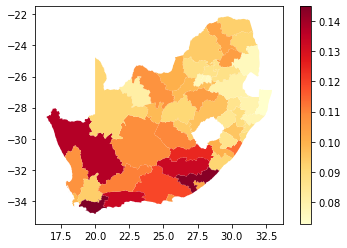

In [45]:
combined.plot(column='percent60PLUS', legend=True, cmap=('YlOrRd'), )



In [52]:
pd.DataFrame(v_sites.drop(columns='geometry')).to_csv('../../data/cleaned/sites_with_districts.csv')

In [54]:
v_sites.columns

Index(['Unnamed: 0', 'District', 'Sub-District', 'Vaccination Site Name',
       'Type of site', 'Pfizer or J&J', 'Start Date', 'Site Active (Yes/No)',
       'Open Days per week', 'Capacity per day', 'Latitude', 'Longitude',
       'Municipality', 'DISTRICT_N', 'DISTRICT_C', 'geometry'],
      dtype='object')

In [72]:
# How many vaccination sites are there per district ? 

combined['Sites'] = combined['DISTRICT_CODE'].map(v_sites.groupby('DISTRICT_C').size())
combined.head()



,DISTRICT,geometry,Population,DISTRICT_CODE,DISTRICT_NAME,T_TL,T_60PLUS,percent60PLUS,Sites
0,EKU,"POLYGON ((28.25658 -25.92406, 28.27121 -25.925...",3609251,EKU,Ekurhuleni,3739653.0,282045.0,0.075420,28.0
1,JHB,"POLYGON ((27.98484 -25.90973, 27.98514 -25.912...",5316210,JHB,City of Johannesburg,5540727.0,422893.0,0.076324,44.0
2,BUF,"POLYGON ((27.35458 -32.67444, 27.37057 -32.675...",866515,BUF,Buffalo City,760840.0,78267.0,0.102869,6.0
3,DC10,"POLYGON ((26.29896 -32.93213, 26.32140 -32.935...",532050,DC10,Sarah Baartman,491156.0,58458.0,0.119021,30.0
4,DC12,"POLYGON ((27.21809 -32.89017, 27.21815 -32.890...",1002243,DC12,Amathole,789726.0,113226.0,0.143374,56.0


<AxesSubplot:title={'center':'Number of Vaccination Sites'}>

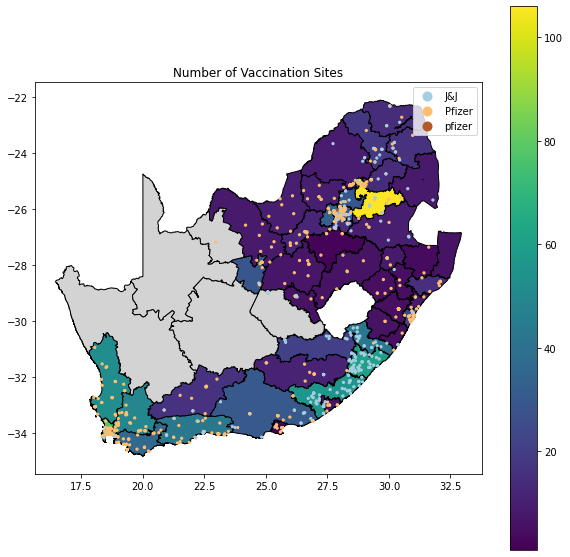

In [99]:
_ , ax = plt.subplots(figsize=(10,10))

# sa_hospitals.plot(ax=ax, facecolor="none", edgecolor="black")

ax.set_title("Number of Vaccination Sites")



combined.plot(column='Sites', edgecolor='black', legend=True, ax=ax, missing_kwds={"color":"lightgrey", "label": "No data"})
v_sites.plot(ax=ax, column='Pfizer or J&J', markersize=5, cmap='Paired', legend=True)

In [76]:
# Group by province

# add province to combined data

combined["Province"] = combined['DISTRICT_CODE'].map(dict(zip(sa_hospitals['DISTRICT'], sa_hospitals['PROVINCE'])))



,geometry,Population,T_TL,T_60PLUS,Sites
Province,,,,,
EC,"POLYGON ((25.84725 -33.72247, 25.84711 -33.722...",7311625,6510816.0,727795.0,229.0
FS,"POLYGON ((27.22294 -29.99677, 27.22312 -30.000...",2924684,2663702.0,257327.0,21.0
GT,"POLYGON ((28.52944 -26.17666, 28.53199 -26.174...",14361344,14760167.0,1182796.0,148.0
KZN,"POLYGON ((30.58340 -30.56118, 30.58332 -30.561...",11565969,10418811.0,919346.0,90.0
LIM,"POLYGON ((29.99775 -25.12913, 29.99929 -25.132...",6044413,5527257.0,539868.0,71.0
MP,"POLYGON ((30.52675 -27.31563, 30.52656 -27.315...",4520630,4547481.0,368293.0,124.0
NC,"POLYGON ((24.95331 -30.22534, 24.95351 -30.225...",1220187,1251220.0,123249.0,29.0
NW,"POLYGON ((27.36153 -26.11769, 27.36130 -26.120...",3975891,3885864.0,369926.0,40.0
WC,"MULTIPOLYGON (((19.41822 -34.68725, 19.41820 -...",6610917,6898299.0,717922.0,274.0


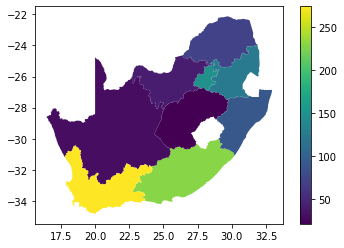

In [100]:
combined_province = combined.dissolve(by='Province', aggfunc='sum').drop(columns=['percent60PLUS'])
combined_province.plot(column='Sites', legend=True)
combined_province

<AxesSubplot:title={'center':'Number of Vaccination Sites'}>

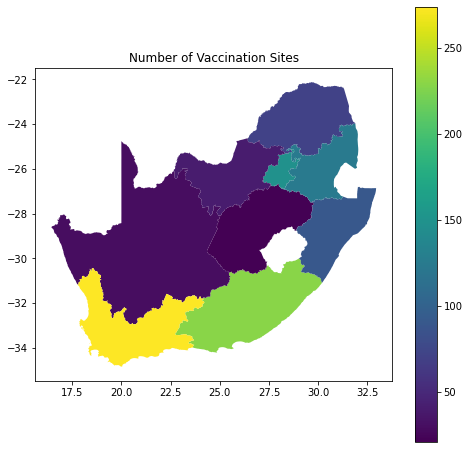

In [81]:
_, sites_province_ax = plt.subplots(figsize=(8,8))

sites_province_ax.set_title("Number of Vaccination Sites")

combined_province.plot(column='Sites', legend=True, ax=sites_province_ax)

In [ ]:
# _ , ax = plt.subplots(figsize=(10,10))



# combined.plot(column='Sites', legend=True, ax=ax)

In [121]:
# Determine population density

## Estimate with Hartebeesthoek94 EPSG

combined["P_Density"] = combined['T_TL'] / (combined.to_crs("EPSG:2051").area / 10 **6)

combined

,DISTRICT,geometry,Population,DISTRICT_CODE,DISTRICT_NAME,T_TL,T_60PLUS,percent60PLUS,Sites,Province,P_Density
0,EKU,"POLYGON ((28.25658 -25.92406, 28.27121 -25.925...",3609251,EKU,Ekurhuleni,3739653.0,282045.0,0.075420,28.0,GT,1887.717022
1,JHB,"POLYGON ((27.98484 -25.90973, 27.98514 -25.912...",5316210,JHB,City of Johannesburg,5540727.0,422893.0,0.076324,44.0,GT,3365.777971
2,BUF,"POLYGON ((27.35458 -32.67444, 27.37057 -32.675...",866515,BUF,Buffalo City,760840.0,78267.0,0.102869,6.0,EC,276.005466
3,DC10,"POLYGON ((26.29896 -32.93213, 26.32140 -32.935...",532050,DC10,Sarah Baartman,491156.0,58458.0,0.119021,30.0,EC,8.430799
4,DC12,"POLYGON ((27.21809 -32.89017, 27.21815 -32.890...",1002243,DC12,Amathole,789726.0,113226.0,0.143374,56.0,EC,37.347242
5,DC13,"POLYGON ((25.26894 -31.21748, 25.26886 -31.218...",822086,DC13,Chris Hani,752217.0,99849.0,0.132740,11.0,EC,20.647293
6,DC14,"POLYGON ((26.15517 -30.48341, 26.15566 -30.483...",377137,DC14,Joe Gqabi,339473.0,42280.0,0.124546,21.0,EC,13.236614
7,DC15,"POLYGON ((29.18180 -31.95186, 29.18170 -31.952...",1511736,DC15,O.R.Tambo,1358678.0,124242.0,0.091443,61.0,EC,111.493522
8,DC44,"POLYGON ((29.54468 -30.64754, 29.54510 -30.647...",879284,DC44,Alfred Nzo,788235.0,79055.0,0.100294,43.0,EC,73.162724
9,NMA,"POLYGON ((25.46655 -33.56087, 25.47915 -33.564...",1320574,NMA,Nelson Mandela Bay,1230491.0,132418.0,0.107614,1.0,EC,628.742872


<AxesSubplot:>

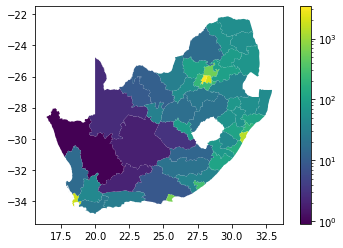

In [124]:
from matplotlib.colors import LogNorm

combined.plot(column='P_Density', legend = True, norm=LogNorm(vmin=combined['P_Density'].min(), vmax=combined['P_Density'].max()))

In [125]:
v_sites.columns

Index(['Unnamed: 0', 'District', 'Sub-District', 'Vaccination Site Name',
       'Type of site', 'Pfizer or J&J', 'Start Date', 'Site Active (Yes/No)',
       'Open Days per week', 'Capacity per day', 'Latitude', 'Longitude',
       'Municipality', 'DISTRICT_N', 'DISTRICT_C', 'geometry'],
      dtype='object')

In [138]:
# add effective weekly vaccination rate

v_sites['daily_rate'] = pd.to_numeric(v_sites['Capacity per day'], errors='coerce')

In [149]:
# Daily rate per district
combined['Capacity per day'] =  combined['DISTRICT'].map(dict(v_sites.groupby('DISTRICT_C').sum()['daily_rate']))

In [164]:
# Days per 
v_sites['week_open'] = pd.to_numeric(v_sites['Open Days per week'].str.replace('days|day', ''), errors='coerce')


combined['Open Days per week'] = combined['DISTRICT'].map(dict(v_sites.groupby('DISTRICT_C').mean()['week_open']))

<ipython-input-164-1d2941f9ee38>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  v_sites['week_open'] = pd.to_numeric(v_sites['Open Days per week'].str.replace('days|day', ''), errors='coerce')


In [165]:
combined

,DISTRICT,geometry,Population,DISTRICT_CODE,DISTRICT_NAME,T_TL,T_60PLUS,percent60PLUS,Sites,Province,P_Density,Capacity per day,Open Days per week
0,EKU,"POLYGON ((28.25658 -25.92406, 28.27121 -25.925...",3609251,EKU,Ekurhuleni,3739653.0,282045.0,0.075420,28.0,GT,1887.717022,6320.0,5.000000
1,JHB,"POLYGON ((27.98484 -25.90973, 27.98514 -25.912...",5316210,JHB,City of Johannesburg,5540727.0,422893.0,0.076324,44.0,GT,3365.777971,13080.0,5.045455
2,BUF,"POLYGON ((27.35458 -32.67444, 27.37057 -32.675...",866515,BUF,Buffalo City,760840.0,78267.0,0.102869,6.0,EC,276.005466,240.0,5.000000
3,DC10,"POLYGON ((26.29896 -32.93213, 26.32140 -32.935...",532050,DC10,Sarah Baartman,491156.0,58458.0,0.119021,30.0,EC,8.430799,2320.0,5.000000
4,DC12,"POLYGON ((27.21809 -32.89017, 27.21815 -32.890...",1002243,DC12,Amathole,789726.0,113226.0,0.143374,56.0,EC,37.347242,2240.0,5.000000
5,DC13,"POLYGON ((25.26894 -31.21748, 25.26886 -31.218...",822086,DC13,Chris Hani,752217.0,99849.0,0.132740,11.0,EC,20.647293,880.0,5.000000
6,DC14,"POLYGON ((26.15517 -30.48341, 26.15566 -30.483...",377137,DC14,Joe Gqabi,339473.0,42280.0,0.124546,21.0,EC,13.236614,1680.0,5.000000
7,DC15,"POLYGON ((29.18180 -31.95186, 29.18170 -31.952...",1511736,DC15,O.R.Tambo,1358678.0,124242.0,0.091443,61.0,EC,111.493522,2440.0,5.000000
8,DC44,"POLYGON ((29.54468 -30.64754, 29.54510 -30.647...",879284,DC44,Alfred Nzo,788235.0,79055.0,0.100294,43.0,EC,73.162724,1800.0,5.000000
9,NMA,"POLYGON ((25.46655 -33.56087, 25.47915 -33.564...",1320574,NMA,Nelson Mandela Bay,1230491.0,132418.0,0.107614,1.0,EC,628.742872,80.0,5.000000


In [167]:
combined.drop(columns='geometry').to_csv('../../data/cleaned/combined_datasets_district_nogeo.csv')

In [180]:
combined['Effective Weekly Rate'] = (combined['Capacity per day'] * combined['Open Days per week'])

In [182]:
# Daily capacity it is know that the programme including private facilities are capable of vaccinating around 200k a day
combined['Capacity per day'].sum()

150914.0

In [181]:
combined.sample(n=10)

,DISTRICT,geometry,Population,DISTRICT_CODE,DISTRICT_NAME,T_TL,T_60PLUS,percent60PLUS,Sites,Province,P_Density,Capacity per day,Open Days per week,Effective Weekly Rate
22,DC25,"POLYGON ((30.29236 -27.95122, 30.29242 -27.951...",587035,DC25,Amajuba,502731.0,43259.0,0.086048,8.0,KZN,70.336533,2650.0,4.750000,12587.500000
47,DC1,"MULTIPOLYGON (((17.98601 -33.15105, 17.98611 -...",470157,DC1,West Coast,497485.0,53443.0,0.107426,52.0,WC,15.843804,1533.0,3.442308,5277.057692
32,DC36,"POLYGON ((28.64031 -23.39401, 28.65898 -23.386...",725475,DC36,Waterberg,718513.0,67674.0,0.094186,9.0,LIM,15.959833,0.0,4.000000,0.000000
23,DC26,"POLYGON ((31.73296 -28.21838, 31.72140 -28.221...",894126,DC26,Zululand,783796.0,62138.0,0.079278,4.0,KZN,52.460115,700.0,2.750000,1925.000000
13,DC20,"POLYGON ((27.31662 -26.85275, 27.31724 -26.852...",507519,DC20,Fezile Dabi,494300.0,51897.0,0.104991,2.0,FS,23.865512,650.0,5.000000,3250.000000
15,DC42,"POLYGON ((28.00901 -26.35058, 28.00902 -26.350...",995665,DC42,Sedibeng,994997.0,96052.0,0.096535,14.0,GT,237.855542,1960.0,5.000000,9800.000000
24,DC27,"POLYGON ((32.61541 -28.13833, 32.61465 -28.141...",704651,DC27,Umkhanyakude,643318.0,46903.0,0.072908,6.0,KZN,45.833692,1700.0,5.166667,8783.333333
9,NMA,"POLYGON ((25.46655 -33.56087, 25.47915 -33.564...",1320574,NMA,Nelson Mandela Bay,1230491.0,132418.0,0.107614,1.0,EC,628.742872,80.0,5.000000,400.000000
41,DC9,"POLYGON ((24.89891 -28.43163, 24.89835 -28.433...",381624,DC9,Frances Baard,420580.0,41235.0,0.098043,29.0,NC,32.344537,4300.0,5.000000,21500.000000
33,DC47,"POLYGON ((29.98339 -25.10078, 29.99508 -25.123...",1252726,DC47,Sekhukhune,1125333.0,118035.0,0.104889,14.0,LIM,82.693028,3600.0,5.000000,18000.000000


In [205]:
# add percentage J&J to to combined to calculate estimated eta
def scoreJJ(x):
    if x == 'J&J':
        return float(1)
    else: 
        return float(0.5)


v_sites['J&J score'] = v_sites['Pfizer or J&J'].apply(lambda x: scoreJJ(x))

v_sites['fully vaccinated daily rate'] = (v_sites['daily_rate'] * v_sites['J&J score'])

In [207]:
v_sites.sample(n=5)

,Unnamed: 0,District,Sub-District,Vaccination Site Name,Type of site,Pfizer or J&J,Start Date,Site Active (Yes/No),Open Days per week,Capacity per day,Latitude,Longitude,Municipality,DISTRICT_N,DISTRICT_C,geometry,daily_rate,week_open,J&J score,fully vaccinated daily rate
757,16,eThekwini MM,eThekwini Sub-district,Amanzimtoti Civic Centre,Temporary Outreach Site,Pfizer,5/17/2021,Yes,5 days,350,-30.057360,30.878820,eThekwini,eThekwini,ETH,POINT (30.87882 -30.05736),350.0,5.0,0.5,175.0
290,61,Cape Town MM,CT Khayelitsha SD,Nolungile CDC,Primary vaccination site,Pfizer,2021-05-24 00:00:00,yes,5 days,50,-28.996321,25.087143,None,City of Cape Town,CPT,POINT (25.08714 -28.99632),50.0,5.0,0.5,25.0
476,247,West Coast,Saldanha Bay Municipality,Saldanha Multi-purpose Hall,Temporary outreach site,Pfizer,2021-06-07 00:00:00,Yes,5 days,35,-33.073240,18.055760,Saldanha Bay,West Coast,DC1,POINT (18.05576 -33.07324),35.0,5.0,0.5,17.5
960,5,Capricorn District,Polokwane LM,PolokwaneTeam B,Mobile Outreach Site,J&J,7/12/2021,yes,4 days,200.0,-24.085280,29.625640,Polokwane,Capricorn,DC35,POINT (29.62564 -24.08528),200.0,4.0,1.0,200.0
518,15,Johannesburg MM,Johannesburg E SD,Alexandra CHC,primary vaccination site,Pfizer,17/05/2021,Yes,5 days,240,-26.099250,28.108350,None,City of Johannesburg,JHB,POINT (28.10835 -26.09925),240.0,5.0,0.5,120.0


In [209]:
combined['fully vaccinated rate'] = combined['DISTRICT'].map(dict(v_sites.groupby('DISTRICT_C').sum()['fully vaccinated daily rate']))

In [213]:
combined['Effective Weekly Rate Full'] = (combined['fully vaccinated rate'] * combined['Open Days per week'])

In [216]:
# save combined

combined.to_file('../../data/cleaned/combined_vaccination_rate.json', driver = 'GeoJSON')